In [436]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline 

In [437]:
import warnings
warnings.filterwarnings("ignore")

# Удаление дубликатов в данных

In [438]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4], 
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [439]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [440]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [441]:
data.T.drop_duplicates().T

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [442]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [443]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [444]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [445]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [446]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [447]:
data.dropna()

,0,1,2,3


In [448]:
data.dropna(how="all")

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [449]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [450]:
data.dropna(thresh=2)

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [451]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,1.590131,NaN,NaN
1,0.512724,NaN,NaN
2,1.063600,NaN,-1.229331
3,-1.308047,NaN,-0.323438
4,-0.467493,-0.148616,-0.510687
5,0.190855,0.576820,1.006696
6,-0.201672,-1.238258,1.291395


In [452]:
df.fillna(0)

,0,1,2
0,1.590131,0.000000,0.000000
1,0.512724,0.000000,0.000000
2,1.063600,0.000000,-1.229331
3,-1.308047,0.000000,-0.323438
4,-0.467493,-0.148616,-0.510687
5,0.190855,0.576820,1.006696
6,-0.201672,-1.238258,1.291395


In [453]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,1.590131,0.500000,0.000000
1,0.512724,0.500000,0.000000
2,1.063600,0.500000,-1.229331
3,-1.308047,0.500000,-0.323438
4,-0.467493,-0.148616,-0.510687
5,0.190855,0.576820,1.006696
6,-0.201672,-1.238258,1.291395


In [454]:
df.fillna(method="bfill")

,0,1,2
0,1.590131,-0.148616,-1.229331
1,0.512724,-0.148616,-1.229331
2,1.063600,-0.148616,-1.229331
3,-1.308047,-0.148616,-0.323438
4,-0.467493,-0.148616,-0.510687
5,0.190855,0.576820,1.006696
6,-0.201672,-1.238258,1.291395


In [455]:
df.fillna(method="bfill", limit=2)

,0,1,2
0,1.590131,NaN,-1.229331
1,0.512724,NaN,-1.229331
2,1.063600,-0.148616,-1.229331
3,-1.308047,-0.148616,-0.323438
4,-0.467493,-0.148616,-0.510687
5,0.190855,0.576820,1.006696
6,-0.201672,-1.238258,1.291395


In [456]:
df.fillna(data.mean())

,0,1,2
0,1.590131,6.500000,3.000000
1,0.512724,6.500000,3.000000
2,1.063600,6.500000,-1.229331
3,-1.308047,6.500000,-0.323438
4,-0.467493,-0.148616,-0.510687
5,0.190855,0.576820,1.006696
6,-0.201672,-1.238258,1.291395


In [457]:
df.fillna(data.median())

,0,1,2
0,1.590131,6.500000,3.000000
1,0.512724,6.500000,3.000000
2,1.063600,6.500000,-1.229331
3,-1.308047,6.500000,-0.323438
4,-0.467493,-0.148616,-0.510687
5,0.190855,0.576820,1.006696
6,-0.201672,-1.238258,1.291395


Медиана более устойчива к выбросам

In [458]:
data_all = []
for i in range(1000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)
    
data_all = np.array(data_all)

<Axes: >

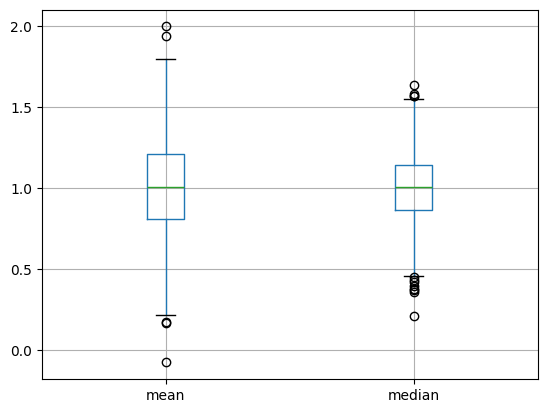

In [459]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [460]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

,0,1,2,2 is nan
0,1.590131,NaN,NaN,1
1,0.512724,NaN,NaN,1
2,1.063600,NaN,-1.229331,0
3,-1.308047,NaN,-0.323438,0
4,-0.467493,-0.148616,-0.510687,0
5,0.190855,0.576820,1.006696,0
6,-0.201672,-1.238258,1.291395,0


Замена значений

In [461]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [462]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [463]:
data = pd.Series(["male"]*10 + ["female"]*5) 
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [464]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [465]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [466]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

In [467]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ... 

In [468]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [469]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [470]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,True,False,False,False,False,False
1,False,False,False,False,True,False
2,True,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
5,False,False,False,False,True,False
6,False,False,False,False,False,True
7,False,True,False,False,False,False
8,False,False,True,False,False,False
9,False,False,False,True,False,False


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Создание новых признаков

Полиномиальные признаки

In [471]:
from sklearn.preprocessing import PolynomialFeatures

In [472]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [473]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<Axes: title={'center': '0'}>]], dtype=object)

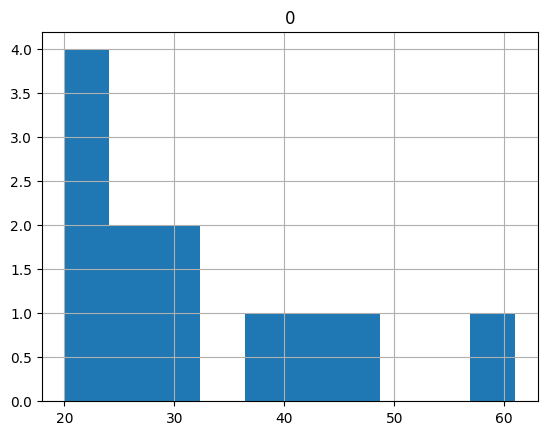

In [474]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [475]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [476]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [477]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [478]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

<Axes: ylabel='Density'>

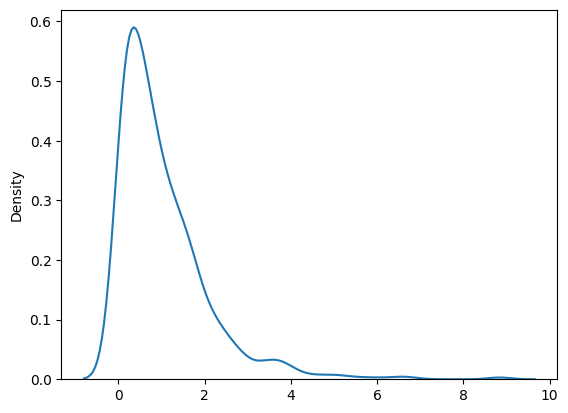

In [479]:
from scipy. stats import boxcox 

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

<Axes: ylabel='Density'>

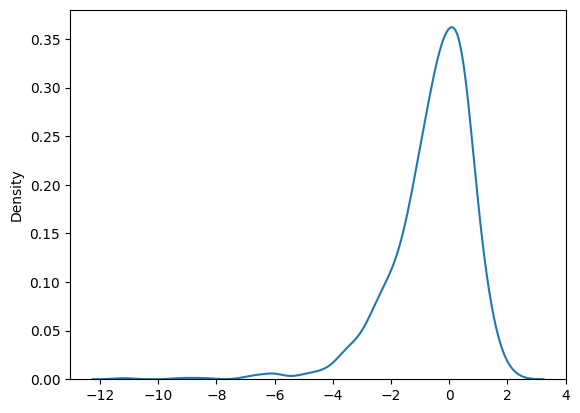

In [480]:
transformed_data = np.log(data) 
sns.distplot(transformed_data, hist=False, kde=True)

<Axes: ylabel='Density'>

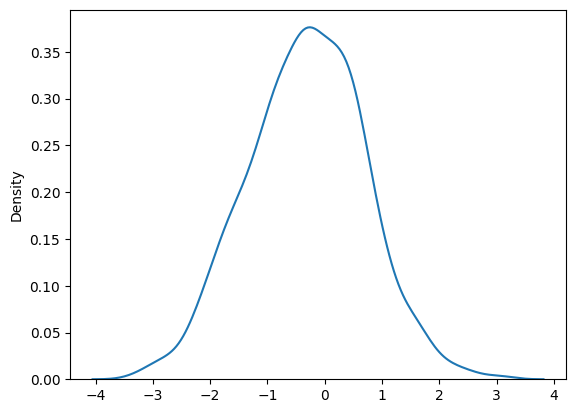

In [481]:
transformed_data, best_lambda = boxcox(data) 

sns.distplot(transformed_data, hist=False , kde=True)

In [482]:
best_lambda

0.2927955327676726

# Домашнее задание

In [483]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [484]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

## Baseline

In [485]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [486]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [487]:
reg = LinearRegression().fit(train_X, train_y)

In [488]:
reg.score(train_X, train_y)

0.4555406785040048

In [489]:
mean_squared_error(reg.predict(train_X), train_y)

29840.1212508653

In [490]:
scores = cross_validate(reg, train_X, train_y, cv=3, 
                        scoring=('neg_mean_squared_error'))

In [491]:
scores

{'fit_time': array([0.02894783, 0.02171516, 0.02028322]),
 'score_time': array([0.00452399, 0.00300264, 0.00352049]),
 'test_score': array([-29836.8590711 , -29618.75539266, -30344.6536926 ])}

In [492]:
mean_squared_error(reg.predict(test_X), test_y)

31021.024399854483

## Предобработка данных

In [493]:
df.describe()

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
count,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,...,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000
mean,30663.219933,4.273511,-0.875116,30684.557267,8.970296,4.290234,0.628512,4.576506,3.756481,1999.358377,...,3.049370,1.867014,12.964828,53.300937,1790.357267,18.434177,2.991421,0.002035,4.474783,2660.826246
std,17666.118635,2.929769,2.904357,17562.733960,6.148230,4.765435,1.230331,1.161683,1.720373,13.433605,...,1.375937,0.350225,4.499009,24.845687,616.347148,9.541600,0.142150,0.045065,39.934808,236.315583
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1904.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1190.000000
25%,15455.000000,3.000000,-1.000000,15578.000000,8.500000,-1.000000,0.000000,4.000000,4.000000,1991.000000,...,1.000000,2.000000,13.000000,46.000000,1992.000000,10.000000,3.000000,0.000000,1.000000,2510.000000
50%,30632.000000,3.000000,-1.000000,30756.000000,9.800000,5.400000,0.000000,4.000000,4.000000,2001.000000,...,4.000000,2.000000,13.000000,58.000000,2002.000000,16.000000,3.000000,0.000000,1.000000,2640.000000
75%,45951.000000,8.000000,-1.000000,45793.000000,10.800000,8.000000,0.000000,6.000000,5.000000,2010.000000,...,4.000000,2.000000,13.000000,68.000000,2011.000000,26.000000,3.000000,0.000000,1.000000,2774.000000
max,61228.000000,10.000000,200.000000,61175.000000,23.500000,40.000000,6.000000,10.000000,8.000000,2021.000000,...,4.000000,2.000000,35.000000,166.000000,2021.000000,36.000000,3.000000,1.000000,658.000000,5885.000000


In [494]:
df.drop('index', axis=1, inplace=True)

In [495]:
categorial_features = [
    'engine-type',
    'gear-type', 
    'supply-system', 
    'valvetrain', 
    'configurations_front-brake', 
    'configurations_safety-rating', 
    'models_group', 
    'models_light-and-commercial'
]

In [496]:
from sklearn.preprocessing import OneHotEncoder

In [497]:
categorical_df = df[categorial_features]
df = df.drop(categorical_df, axis=1)
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_df = pd.DataFrame(ohe.fit_transform(categorical_df))
ohe_df.columns = ohe.get_feature_names_out()
df = pd.concat([df, ohe_df], axis=1)
df

,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,...,configurations_front-brake_4,configurations_safety-rating_0,configurations_safety-rating_1,configurations_safety-rating_2,models_group_0,models_group_1,models_group_2,models_group_3,models_light-and-commercial_0,models_light-and-commercial_1
0,9,-1.0,36457,9.0,4.3,0,3,4,2006,2018,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,3,-1.0,44872,8.0,-1.0,3,7,4,1982,1993,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,3,-1.0,55927,16.0,4.2,0,4,5,2014,2018,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0,-1.0,41405,10.3,-1.0,0,4,4,2000,2003,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,8,-1.0,22523,19.0,-1.0,0,4,8,2000,2005,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,9,-1.0,34558,11.2,6.6,0,4,4,2004,2016,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
43241,3,-1.0,38268,9.6,5.8,0,4,2,2013,2015,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
43242,3,-1.0,8958,10.0,9.3,0,4,4,1991,1999,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
43243,3,-1.0,20293,8.5,-1.0,0,5,4,2002,2004,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [498]:
X = df.drop('target', axis=1)
y = df.target
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [499]:
train_X['battery-capacity'] = train_X['battery-capacity'].replace(-1, np.nan)
test_X['battery-capacity'] = test_X['battery-capacity'].replace(-1, np.nan)
test_X['battery-capacity']
battery_capacity_median = np.nanmedian(train_X['battery-capacity'])

In [500]:
train_X['battery-capacity'].fillna(battery_capacity_median, inplace=True)
test_X['battery-capacity'].fillna(battery_capacity_median, inplace=True)

In [501]:
linear_reg = LinearRegression().fit(train_X, train_y)

In [506]:
linear_reg.score(test_X, test_y)

0.4870856955838183

In [509]:
train_poly_X = poly.fit_transform(train_X)
test_poly_X = poly.fit_transform(test_X)

In [510]:
reg_with_poly = LinearRegression().fit(train_poly_X, train_y)

In [512]:
reg_with_poly.score(test_poly_X, test_y)

-37196.13225690572

In [513]:
from sklearn.feature_selection import SelectKBest, f_regression

In [514]:
f_statistic, p_value = f_regression(train_poly_X, train_y)
selector = SelectKBest(f_regression, k=500)
train_X = pd.DataFrame(selector.fit_transform(train_poly_X, train_y), columns=selector.get_feature_names_out())
test_X = pd.DataFrame(selector.transform(test_poly_X), columns=selector.get_feature_names_out())

In [515]:
model_for_best_features = LinearRegression().fit(train_X, train_y)

In [516]:
model_for_best_features.score(test_X, test_y)

0.6992613923424471